ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

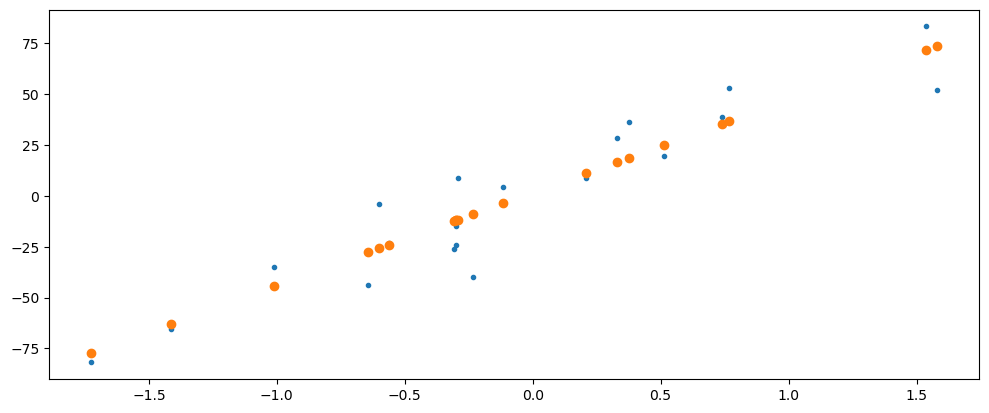

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# découpage manuel du tableau
# on va devoir le faire de nombreuses fois donc on va faire une fonction

# automatise le calcul des valeurs prédites
def autofit(x, y, polyfit=0, t_size=.2) :
    
    model = LinearRegression()
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=t_size)

    if polyfit > 1 :
        poly = PolynomialFeatures(degree=polyfit)
        xtrain = poly.fit_transform(xtrain)
        xtest_poly = poly.fit_transform(xtest)

    model.fit(xtrain, ytrain)


    if polyfit > 1 : pred = model.predict(xtest_poly)
    else : pred = model.predict(xtest)

    return xtest, ytest, pred

# découpe un dataset selon un tableau de valeurs limites et affiche le resultat sur
# le même graphique
def splitplot(x_data, y_data, split:list):

    plt.figure().set_figwidth(12)
    split.append(-1)
    nprev = 0
    for n in split :
        x, ydata, ypred = autofit(x_data[nprev:n], y_data[nprev:n], polyfit=1)
        plt.plot(x, ydata, '.')
        plt.plot(x, ypred, 'o')
        nprev = n
    plt.show()

div3 = [360,720]
div4 = [275,550,825]

x,y = make_regression(n_samples=100,n_features=1,noise=15,random_state=42)


splitplot(x, y, div3)
splitplot(x, y, div4)
